# Machine Learning - Módulo III

## Tarea 1

### Pregunta 1

Programe en lenguaje Python una funci ́on que reciba como entrada la matriz de confusi ́on (para el caso 2 × 2) que calcule y retorne en una lista: la Precisio ́n Global, el Error Global, la Precisi ́on Positiva (PP), la Precisio ́n Negativa (PN), los Falsos Positivos (FP), los Falsos Negativos (FN), la Asertividad Positiva (AP) y la Asertividad Negativa (NP).

Supongamos que tenemos un modelo predictivo para detectar Fraude en Tarjetas de Cr ́edito, la variable a predecir es Fraude con dos posibles valores Sı ́ (para el caso en que s ́ı fue fraude) y No (para el caso en que no fue fraude). Supongamos la matriz de confusio ́n es:

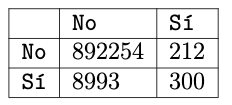

**a)** Calcule la Precisi ́on Global, el Error Global, la Precisio ́n Positiva (PP), la Precisi ́on Ne- gativa (PN), los Falsos Positivos (FP), los Falsos Negativos (FN), la Asertividad Positiva (AP) y la Asertividad Negativa (NP).

In [1]:
from IndexesCalculator import IndexesCalculator
from DataFrameUtils import DataFrameUtils
import pprint

matrix = [[892254, 212],
          [8993,   300]]
confusion_matrix = DataFrameUtils.create_dataframe(matrix, indexes = ["NO", "SI"], columns = ["NO", "SI"])
calculator = IndexesCalculator(confusion_matrix)
calculator.show_confusion_matrix_indexes()

Matriz de Confusión: 
        NO   SI
NO  892254  212
SI    8993  300

Precisión Global: 0.989792172853279
Error Global: 0.010207827146720971
Precision por Categoría:
         NO        SI
0  0.999762  0.032282

Falsos Positivos por Categoría: 
         NO        SI
0  0.000238  0.967718

Asertividad por Categoría: 
         NO        SI
0  0.990022  0.585938



**b)** ¿Es bueno o malo el modelo predictivo? Justifique su respuesta.

> La presición global del modelo es de 0.98 lo cual implicaría que la predicción es buena, sin embargo nos damos cuenta que la presición por categoría es muy buena para valores negativos pero muy mala para predecir positivos, por lo tanto el modelo debe ser ajustado para poder realizar una mejor predicción.

### Pregunta 2

En este ejercicio usaremos los datos (voces.csv). Se trata de un problema de reconocimiento de g ́enero mediante el an ́alisis de la voz y el habla. Esta base de datos fue creada para identificar una voz como masculina o femenina, basa ́ndose en las propiedades acu ́sticas de la voz y el habla. El conjunto de datos consta de 3.168 muestras de voz grabadas, recogidas de hablantes masculinos y femeninos.

El conjunto de datos tiene las siguientes propiedades acu ́sticas (variables) de cada voz:

 - **meanfreq:** frecuencia media (en kHz). 
 - **sd:** desviaci ́on esta ́ndar de frecuencia. 
 - **median:** frecuencia mediana (en kHz).
 - **Q25:** primer cuantil (en kHz).
 - **Q75:** tercer cuantil (en kHz).
 - **IQR:** rango intercuantile (en kHz).
 - **skew:** sesgo (ver nota en la descripcio ́n de specprop).
 - **kurt:** kurtosis (ver nota en la descripcio ́n de specprop).
 - **sp.ent:** entrop ́ıa espectral.
 - **sfm:** planitud espectral.
 - **mode:** modo frecuencia.
 - **centroide:** centroide de frecuencia (ver specprop).
 - **peakf:** frecuencia de pico (frecuencia con mayor energ ́ıa).
 - **meanfun:** promedio de la frecuencia fundamental medida a trav ́es de la sen ̃al acu ́stica.
 - **minfun:** frecuencia m ́ınima fundamental medida a trav ́es de la sen ̃al acu ́stica.
 - **maxfun:** m ́axima frecuencia fundamental medida a trav ́es de la sen ̃al acu ́stica.
 - **meandom:** promedio de la frecuencia dominante medida a trav ́es de la sen ̃al acu ́stica.
 - **mindom:** m ́ınimo de la frecuencia dominante medida a trav ́es de la sen ̃al acu ́stica.
 - **maxdom:** m ́aximo de la frecuencia dominante medida a trav ́es de la sen ̃al acu ́stica.
 - **dfrange:** rango de frecuencia dominante medido a trav ́es de la sen ̃al acu ́stica.
 - **modindx:**  ́ındice de modulaci ́on. Calculado como la diferencia absoluta acumulada entre las mediciones adyacentes de las frecuencias fundamentales dividida por la gama de fre- cuencias.
 - **ge ́nero:** Masculino o Femenino (variable a predecir).
 
Realice lo siguiente:

**1.** Cargue la tabla de datos voces.csv en Python.

In [2]:
from DataFrameUtils import DataFrameUtils
from QualityModel import QualityModel

data = DataFrameUtils.read_cvs("./data/voces.csv", delimiter = ",", index_col = None)
model = QualityModel(data)


**2.** Realice un ana ́lisis exploratorio (estad ́ısticas b ́asicas) que incluya: el resumen num ́erico (media, desviacio ́n esta ́ndar, etc.), los valores at ́ıpicos, la correlacio ́n entre las variables, el poder predictivo de las variables predictoras. Interprete los resultados.

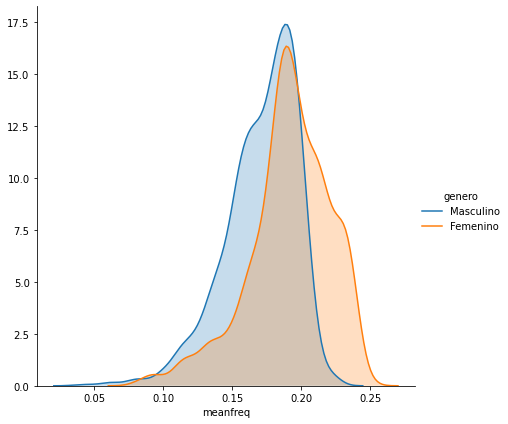

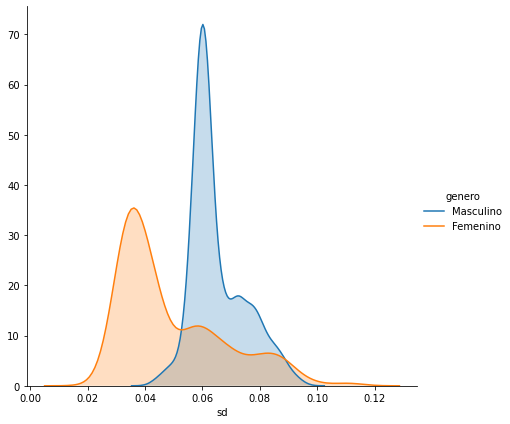

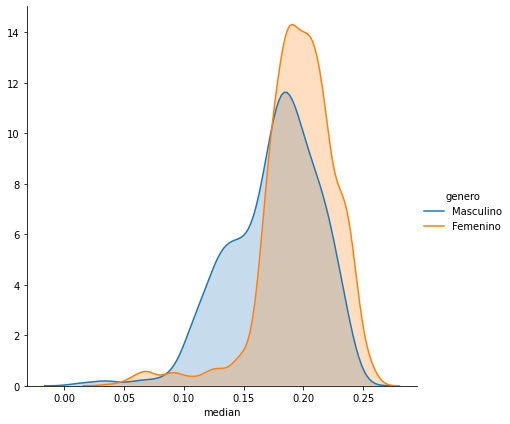

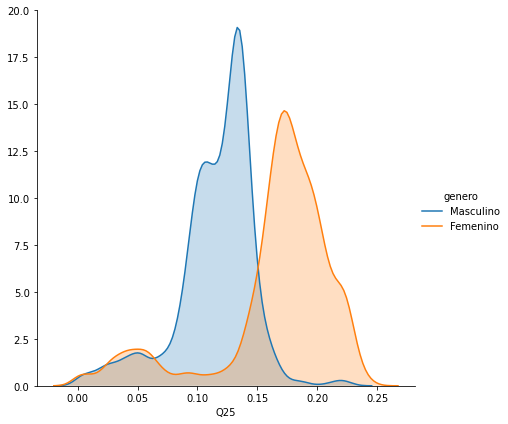

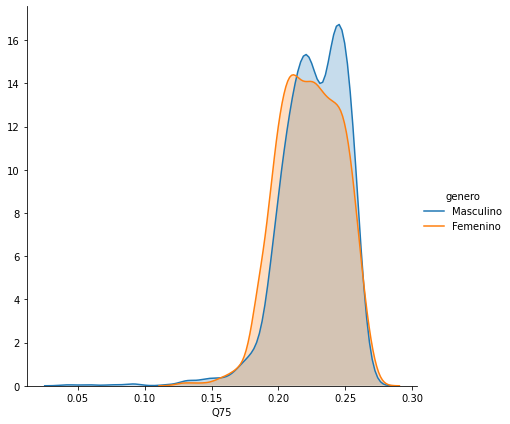

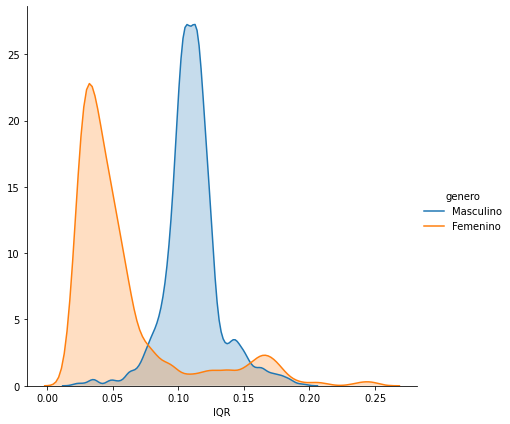

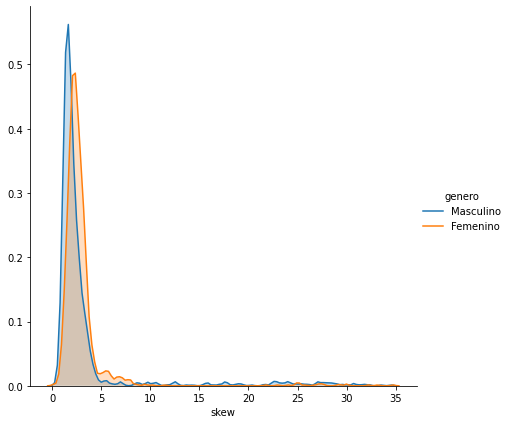

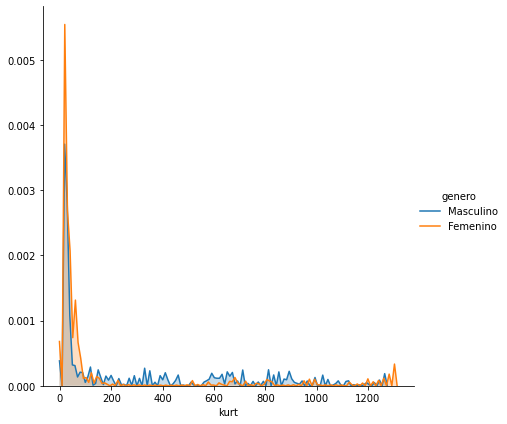

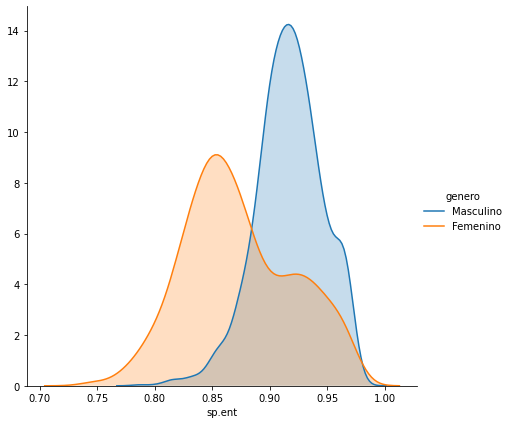

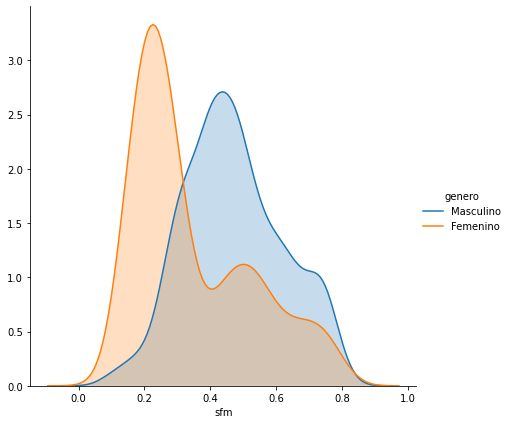

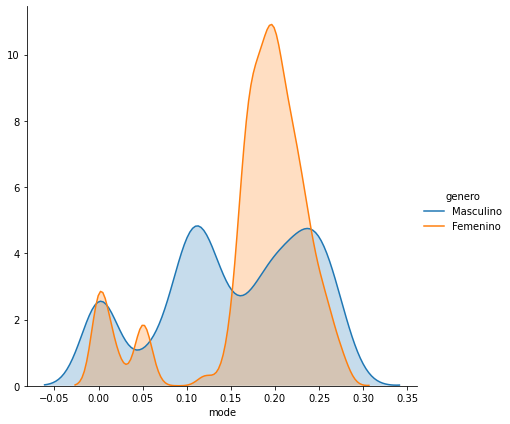

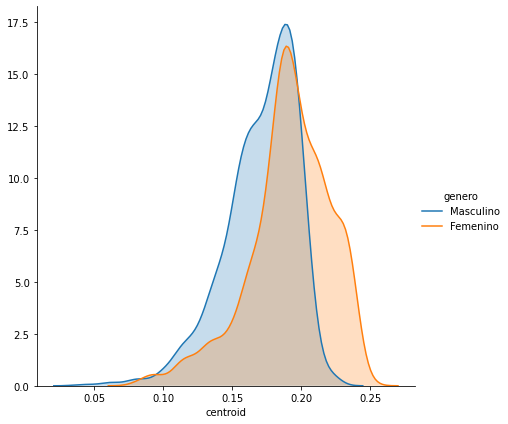

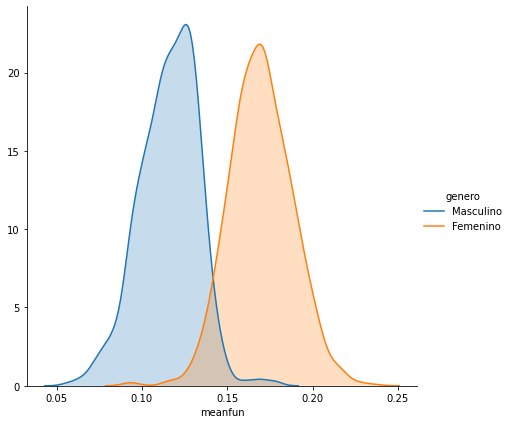

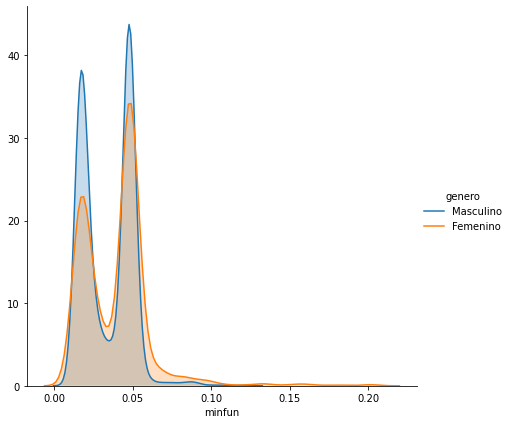

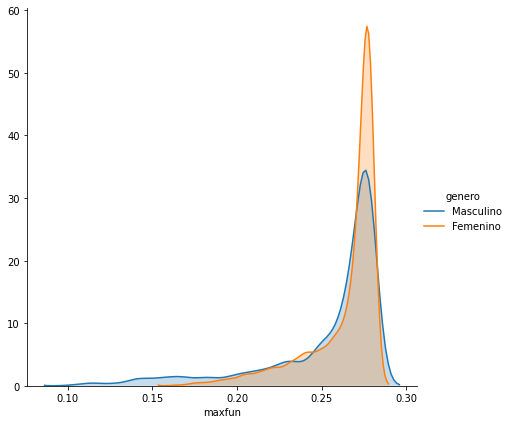

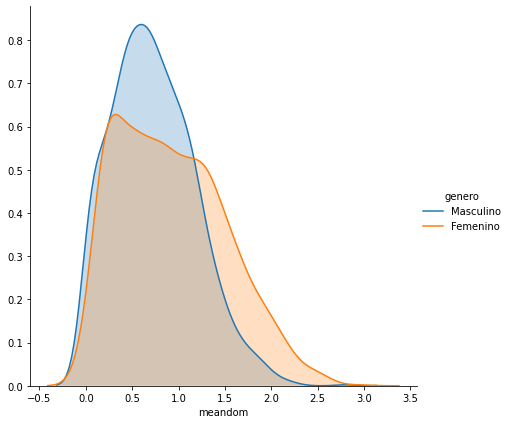

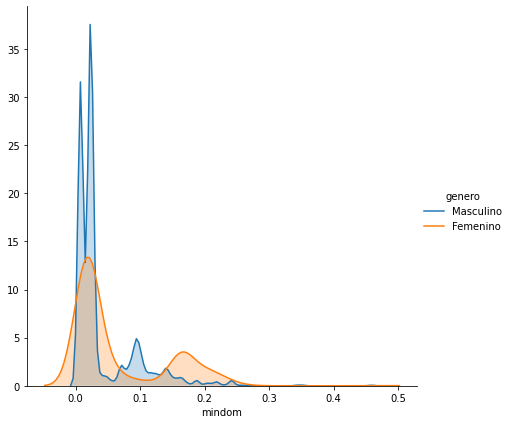

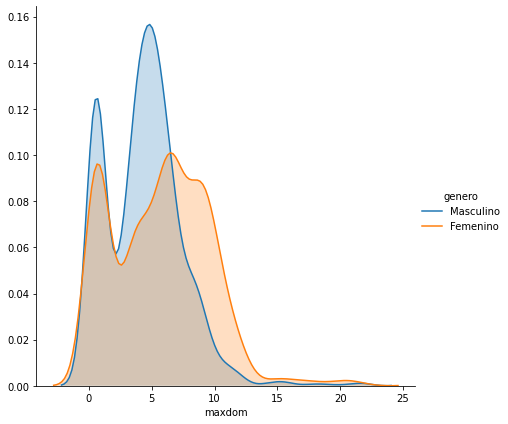

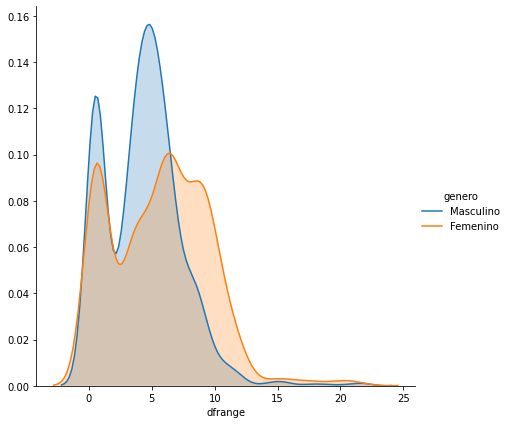

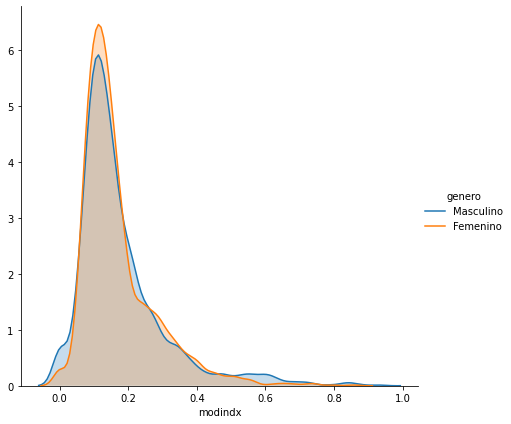

In [3]:
model.predictive_power_by_variable()

**3.** ¿Es este problema equilibrado o desequilibrado? Justifique su respuesta.

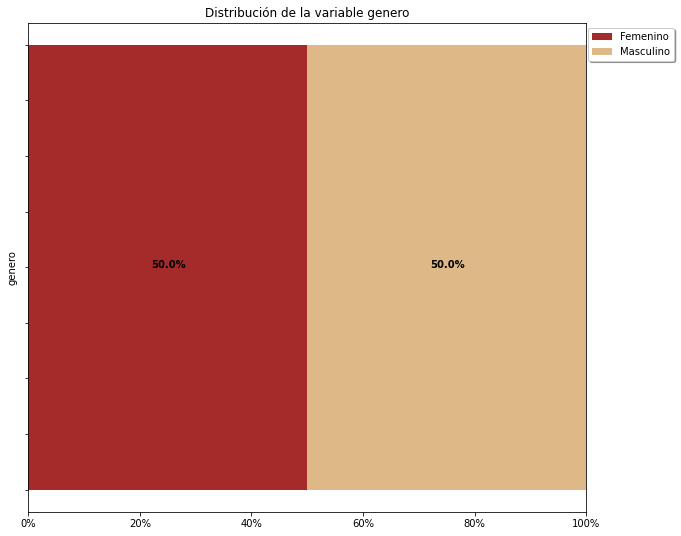

In [4]:
model.distribution_predict_variable("genero")

> **Justificación**
 - Se muestra en la gráfica de la distribución de la variable a predecir que existe un 50% para cada categoría, por lo que se considera un problema equilibrado

**4.** Use el m ́etodo de K vecinos m ́as cercanos en Python (con los para ́metros por defecto) para generar un modelo predictivo para la tabla voces.csv usando el 80 % de los datos para la tabla aprendizaje y un 20% para la tabla testing, luego calcule para los datos de testing la matriz de confusio ́n, la precisi ́on global y la precisio ́n para cada una de las dos categor ́ıas.

In [5]:
from PredictiveModel import PredictiveModel

predictiveModel = PredictiveModel(data)
predictiveModel.build_model("genero", train_size = 0.8)

Variables Predictoras:
   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  0.000000  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  0.000000  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  0.000000  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  0.083878  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  0.104261  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange

In [6]:
predictiveModel.train_model()

Las predicciones en Testing son: ['Masculino' 'Masculino' 'Masculino' 'Masculino' 'Masculino' 'Masculino'
 'Femenino' 'Femenino' 'Femenino' 'Femenino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Femenino' 'Masculino'
 'Masculino' 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Femenino'
 'Masculino' 'Masculino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino'
 'Masculino' 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Masculino'
 'Masculino' 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Masculino' 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Femenino' 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Masculino'
 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Mascul

In [7]:
confusion_matrix1 = predictiveModel.obtain_confusion_matrix()
print(confusion_matrix1)

           Femenino  Masculino
Femenino        200        101
Masculino        81        252


In [8]:
calculator = IndexesCalculator(confusion_matrix1)
print(f"Precisión Global: \n{calculator.accurancy}\n")
print(f"Precision por Categoría: \n{calculator.category_precisions}\n")

Precisión Global: 
0.7129337539432177

Precision por Categoría: 
   Femenino  Masculino
0  0.664452   0.756757



> **¿Son buenos los resultados? Explique.**
 - La presición global del modelo es de 0.713, lo cual implicaría que es un modelo aceptable sin ser del todo bueno, adicionalmente en las predicciones por categoría se muestra que es decifiente para predecir Femeninos y un poco mejor Masculinos, se debe ajustar el modelo para mejorar los resultados. En las graáficas de poder predictivo evidenciamos claramente estos resultados ya que la mayoría de las variables se solapan haciendo más complicada la predicción.

**5.** Repita el item d), pero esta vez, seleccione las 6 variables que, segu ́n su criterio, tienen mejor poder predictivo. ¿Mejoran los resultados?

Las variables seleccionadas de acuerdo a su poder predictivo son las siguientes:

- "sd"
- "Q25"
- "IQR"
- "sfm"
- "sp.ent"
- "meanfun"
- "genero"

In [9]:
data = DataFrameUtils.filter_columns(data, ["sd", "Q25", "IQR", "sfm", "sp.ent", "meanfun", "genero"])

predictiveModel = PredictiveModel(data)
predictiveModel.build_model("genero", train_size = 0.8)

Variables Predictoras:
         sd       Q25       IQR       sfm    sp.ent   meanfun
0  0.064241  0.015071  0.075122  0.491918  0.893369  0.084279
1  0.067310  0.019414  0.073252  0.513724  0.892193  0.107937
2  0.083829  0.008701  0.123207  0.478905  0.846389  0.098706
3  0.072111  0.096582  0.111374  0.727232  0.963322  0.088965
4  0.079146  0.078720  0.127325  0.783568  0.971955  0.106398
Variable a Predecir:
      genero
0  Masculino
1  Masculino
2  Masculino
3  Masculino
4  Masculino


In [10]:
predictiveModel.train_model()

Las predicciones en Testing son: ['Femenino' 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino'
 'Femenino' 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Masculino' 'Femenino' 'Femenino' 'Masculino'
 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Femenino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Masculino' 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino'
 'Masculino' 'Masculino' 'Masculino' 'Femenino' 'Masculino' 'Masculino'
 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculi

In [11]:
confusion_matrix2 = predictiveModel.obtain_confusion_matrix()
print(confusion_matrix2)

           Femenino  Masculino
Femenino        297          4
Masculino         6        327


In [12]:
calculator2 = IndexesCalculator(confusion_matrix2)
print(f"Precisión Global: \n{calculator2.accurancy}\n")
print(f"Precision por Categoría: \n{calculator2.category_precisions}\n")

Precisión Global: 
0.9842271293375394

Precision por Categoría: 
   Femenino  Masculino
0  0.986711   0.981982



> **Respuesta**
- Seleccionado solamente las variables que tienen un mejor poder de predicción se nota un cambio radical en la precisión del modelo, la precisión global es de 0.984, muy similar a las predicciones por categoría, se puede acetar el modelo ideal para predecir géneros


**6.** Usando la funcio ́n programada en el ejercicio 1, los datos voces.csv y los modelos gene- rados arriba construya un DataFrame de manera que en cada una de las filas aparezca un modelo predictivo y en las columnas aparezcan los  ́ındices Precisi ́on Global, Error Global Precisi ́on Positiva (PP), Precisi ́on Negativa (PN), Falsos Positivos (FP), los Falsos Ne- gativos (FN), la Asertividad Positiva (AP) y la Asertividad Negativa (AN). 

In [13]:
calculator1 = IndexesCalculator(confusion_matrix1)
rows1 = calculator1.get_indexes_dictionary()
calculator2 = IndexesCalculator(confusion_matrix2)
rows2 = calculator2.get_indexes_dictionary()

data_dict = DataFrameUtils.create_dataframe_from_dict([rows1, rows2])
print(data_dict)


   Precisión Global  Error Global  Presición Femenino  Presición Masculino  \
0          0.712934      0.287066            0.664452             0.756757   
1          0.984227      0.015773            0.986711             0.981982   

   Falso Positivo Femenino  Falso Positivo Masculino  Asertividad Femenino  \
0                 0.335548                  0.243243              0.335548   
1                 0.013289                  0.018018              0.013289   

   Asertividad Masculino  
0               0.243243  
1               0.018018  


> **¿Cuál de los modelos es mejor para estos datos?**
 - Como se respondió en el item anterior, la matriz que vemos en el cuadro anterior nos muestra que la segunda version del modelo, la que solamente utiliza las 6 variables con mejor poder predictivo es la que se debe usar pues sus resultados son óptimos

**7.** Repita el ejercicio 4, pero esta vez use en el m ́etodo KNeighborsClassifier utilice los 4 diferentes algoritmos auto, ball tree, kd tree y brute. ¿Cua ́l da mejores resultados?

> Las ejecuciones iniciales fueron ejecutadas con el algoritmo por defecto **auto**, a continuación ejecutaremos usando los algoritmos **ball_tree, kd_tree y brute**:

In [14]:
data = DataFrameUtils.read_cvs("./data/voces.csv", delimiter = ",", index_col = None)

predictiveModel = PredictiveModel(data)
predictiveModel.build_model("genero", train_size = 0.8)

# Usando algoritmo ball_tree
predictiveModel.train_model(algorithm = "ball_tree")
confusionMatrixBallTree = predictiveModel.obtain_confusion_matrix()
indexesBallTree = IndexesCalculator(confusionMatrixBallTree).get_indexes_dictionary()

# Usando algoritmo kd_tree
predictiveModel.train_model(algorithm = "kd_tree")
confusionMatrixKDTree = predictiveModel.obtain_confusion_matrix()
indexesKDTree = IndexesCalculator(confusionMatrixKDTree).get_indexes_dictionary()

# Usando algoritmo brute
predictiveModel.train_model(algorithm = "brute")
confusionMatrixBrute = predictiveModel.obtain_confusion_matrix()
indexesBrute = IndexesCalculator(confusionMatrixBrute).get_indexes_dictionary()

# Creando data frame para comparar resultados
data_dict = DataFrameUtils.create_dataframe_from_dict([rows1,indexesBallTree, indexesKDTree, indexesBrute])
data_dict.index = ["auto", "ball_tree", "kd_tree", "brute"]
print(data_dict)

Variables Predictoras:
   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  0.000000  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  0.000000  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  0.000000  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  0.083878  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  0.104261  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange

Las predicciones en Testing son: ['Masculino' 'Masculino' 'Masculino' 'Masculino' 'Masculino' 'Masculino'
 'Femenino' 'Femenino' 'Femenino' 'Femenino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Femenino' 'Masculino'
 'Masculino' 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Femenino'
 'Masculino' 'Masculino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino'
 'Masculino' 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Masculino'
 'Masculino' 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Masculino' 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Femenino' 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Masculino'
 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Mascul

           Precisión Global  Error Global  Presición Femenino  \
auto               0.712934      0.287066            0.664452   
ball_tree          0.712934      0.287066            0.664452   
kd_tree            0.712934      0.287066            0.664452   
brute              0.712934      0.287066            0.664452   

           Presición Masculino  Falso Positivo Femenino  \
auto                  0.756757                 0.335548   
ball_tree             0.756757                 0.335548   
kd_tree               0.756757                 0.335548   
brute                 0.756757                 0.335548   

           Falso Positivo Masculino  Asertividad Femenino  \
auto                       0.243243              0.335548   
ball_tree                  0.243243              0.335548   
kd_tree                    0.243243              0.335548   
brute                      0.243243              0.335548   

           Asertividad Masculino  
auto                    0.243243  
ba

> **¿Cual da mejores resultados?**
 Se visualiza que los índices son los mismos para todos los algoritmos utilizados, al parecer los resultados dependen en este caso más de las variables utilizadas para entrenamiento y su poder de predicción

### Pregunta 3

Esta pregunta utiliza los datos (tumores.csv). Se trata de un conjunto de datos de caracter ́ısticas del tumor cerebral que incluye cinco variables de primer orden y ocho de textura y cuatro par ́ametros de evaluacio ́n de la calidad con el nivel objetivo. La variables son: Media, Varianza, Desviacio ́n esta ́ndar, Asimetr ́ıa, Kurtosis, Contraste, Energ ́ıa, ASM (segundo momento angular), Entrop ́ıa, Homogeneidad, Disimilitud, Correlacio ́n, Grosor, PSNR (Pico de la relacio ́n sen ̃al-ruido), SSIM (Indice de Similitud Estructurada), MSE (Mean
Square Error), DC (Coeficiente de Dados) y la variable a predecir tipo (1 = Tumor, 0 = No-Tumor).

Realice lo siguiente:

**1.** Use el m ́etodo de K vecinos ma ́s cercanos en Python para generar un modelo predictivo para la tabla tumores.csv usando el 70% de los datos para la tabla aprendizaje y un 20 % para la tabla testing.

In [15]:
data_tumores = DataFrameUtils.read_cvs("./data/tumores.csv", delimiter = ",", index_col = 0)
#DataFrameUtils.recode_category(data_tumores, "tipo")

predictiveModel = PredictiveModel(data_tumores)
predictiveModel.build_model("tipo", train_size = 0.7)

Variables Predictoras:
            media     varianza  desviacion.estandar  entropia  asimetria  \
imagen                                                                     
Image1  23.448517  2538.985627            50.388348  0.651174   1.984202   
Image2   4.398331   834.853030            28.893823  0.953532   6.495203   
Image3   3.244263   642.059166            25.338886  0.966065   7.772860   
Image4   8.511353  1126.214187            33.559115  0.868765   3.763142   
Image5  21.000793  2235.316978            47.279139  0.684724   1.936029   

         kurtosis   contraste   energia       asm  homogeneidad  disiminitud  \
imagen                                                                         
Image1   5.421042  181.467713  0.781557  0.610831      0.847033     2.765411   
Image2  43.349355   76.745886  0.972770  0.946281      0.980762     0.548605   
Image3  61.756034   81.752406  0.980161  0.960715      0.985066     0.540411   
Image4  15.107579  362.291213  0.921786  0.8

**2.** Genere un Modelo Predictivo usando K vecinos ma ́s cercanos para cada uno de los siguien- tes nu ́cleos: auto, ball tree, kd tree y brute

In [16]:
# Usando algoritmo auto
predictiveModel.train_model()
confusionMatrix = predictiveModel.obtain_confusion_matrix()
indexes = IndexesCalculator(confusionMatrix).get_indexes_dictionary()

# Usando algoritmo ball_tree
predictiveModel.train_model(algorithm = "ball_tree")
confusionMatrixBallTree = predictiveModel.obtain_confusion_matrix()
indexesBallTree = IndexesCalculator(confusionMatrixBallTree).get_indexes_dictionary()

# Usando algoritmo kd_tree
predictiveModel.train_model(algorithm = "kd_tree")
confusionMatrixKDTree = predictiveModel.obtain_confusion_matrix()
indexesKDTree = IndexesCalculator(confusionMatrixKDTree).get_indexes_dictionary()

# Usando algoritmo brute
predictiveModel.train_model(algorithm = "brute")
confusionMatrixBrute = predictiveModel.obtain_confusion_matrix()
indexesBrute = IndexesCalculator(confusionMatrixBrute).get_indexes_dictionary()

# Creando data frame para comparar resultados
data_dict = DataFrameUtils.create_dataframe_from_dict([indexes,indexesBallTree, indexesKDTree, indexesBrute])
data_dict.index = ["auto", "ball_tree", "kd_tree", "brute"]
print(data_dict)

Las predicciones en Testing son: [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
Las predicciones en Testing son: [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1

> **¿Cua ́l produce los mejores resultados en el sentido de que predice mejor los tumores, es decir, Tumor = 1.**
 - Claramente los cuatro algoritmos utilizados estan retornando los mismos valores, lo que nos lleva a pensar que se puede utilizar cualquiera para la presente predicción

### Pregunta 4

En este ejercicio vamos a predecir nu ́meros escritos a mano (Hand Written Digit Recognition), la tabla de aprendizaje esta ́ en el archivo ZipDataTrainCod.csv y la tabla de testing esta ́ en el archivo ZipDataTestCod.csv. En la figura siguiente se ilustran los datos:

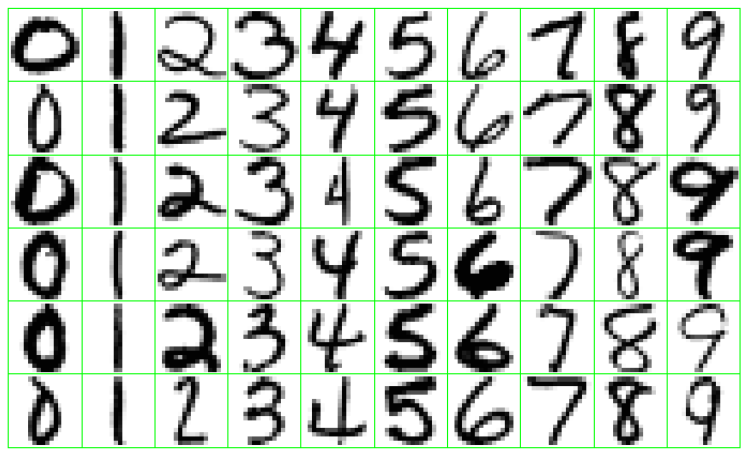

Los datos de este ejemplo vienen de los co ́digos postales escritos a mano en sobres del correo postal de EE.UU. Las ima ́genes son de 16 × 16 en escala de grises, cada pixel va de intensidad de −1 a 1 (de blanco a negro). Las im ́agenes se han normalizado para tener aproximadamente el mismo taman ̃o y orientacio ́n. La tarea consiste en predecir, a partir de la matriz de 16 × 16 de intensidades de cada pixel, la identidad de cada imagen (0,1,...,9) de forma ra ́pida y precisa. Si es lo suficientemente precisa, el algoritmo resultante se utiliza como parte de un procedimiento de selecci ́on automa ́tica para sobres. Este es un problema de clasificacio ́n para el cual la tasa de error debe mantenerse muy baja para evitar la mala direccio ́n de correo. La columna 1 tiene la variable a predecir Nu ́mero codificada como sigue: 0=‘cero’; 1=‘uno’; 2=‘dos’; 3=‘tres’; 4=‘cuatro’; 5=‘cinco’;6=‘seis’; 7=‘siete’; 8=‘ocho’ y 9=‘nueve’, las dema ́s columnas son las variables predictivas, adema ́s cada fila de la tabla representa un bloque 16 × 16 por lo que la matriz tiene 256 variables predictoras.


**1.** Usando K vecinos ma ́s cercanos un modelo predictivo para la tabla de aprendizaje, con los par ́ametros que usted estime ma ́s convenientes.

In [17]:
data_train = DataFrameUtils.read_cvs("./data/ZipDataTrainCod.csv", index_col = None)
print(data_train.head())

data_test = DataFrameUtils.read_cvs("./data/ZipDataTestCod.csv", index_col = None)
print(data_test.head())

predictiveModel = PredictiveModel()
predictiveModel.build_model_with_data("Numero", data_train, data_test)

predictiveModel.train_model()

   Numero   V2   V3   V4     V5     V6     V7     V8     V9    V10  ...  \
0    seis -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -0.631  0.862  ...   
1   cinco -1.0 -1.0 -1.0 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853  ...   
2  cuatro -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000  ...   
3   siete -1.0 -1.0 -1.0 -1.000 -1.000 -0.273  0.684  0.960  0.450  ...   
4    tres -1.0 -1.0 -1.0 -1.000 -1.000 -0.928 -0.204  0.751  0.466  ...   

    V248   V249   V250   V251   V252   V253   V254   V255   V256  V257  
0  0.304  0.823  1.000  0.482 -0.474 -0.991 -1.000 -1.000 -1.000  -1.0  
1 -0.671 -0.671 -0.033  0.761  0.762  0.126 -0.095 -0.671 -0.828  -1.0  
2 -1.000 -1.000 -1.000 -0.109  1.000 -0.179 -1.000 -1.000 -1.000  -1.0  
3 -0.318  1.000  0.536 -0.987 -1.000 -1.000 -1.000 -1.000 -1.000  -1.0  
4  0.466  0.639  1.000  1.000  0.791  0.439 -0.199 -0.883 -1.000  -1.0  

[5 rows x 257 columns]
  Numero   V2   V3   V4     V5   V6     V7     V8     V9    V10  ...   V248  \
0  nueve

**2.** Con la tabla de testing calcule la matriz de confusi ́on, la precisio ́n global, el error global y la precisio ́n en cada unos de los d ́ıgitos. ¿Son buenos los resultados?

In [18]:
confusion_matrix = predictiveModel.obtain_confusion_matrix()

In [19]:
calculator = IndexesCalculator(confusion_matrix)
print(f"Precisión Global: \n{calculator.accurancy}\n")
print(f"Error Global: \n{calculator.error_rate}\n")
print(f"Precision por Categoría: \n{calculator.category_precisions}\n")

Precisión Global: 
0.9456900847035377

Error Global: 
0.05430991529646234

Precision por Categoría: 
       cero    cinco  cuatro       dos     nueve      ocho      seis    siete  \
0  0.986072  0.91875    0.92  0.919192  0.960452  0.921687  0.952941  0.92517   

       tres       uno  
0  0.915663  0.977273  



**3.** Repita los ejercicios 1, 2 y 3 pero usando solamente los 3s, 5s y los 8s. ¿Mejora la predic- cio ́n?

In [20]:
data_train = DataFrameUtils.read_cvs("./data/ZipDataTrainCod.csv", index_col = None)
data_train = DataFrameUtils.filter_rows(data_train, "Numero", ["tres", "cinco", "ocho"])
data_test = DataFrameUtils.read_cvs("./data/ZipDataTestCod.csv", index_col = None)
data_test = DataFrameUtils.filter_rows(data_test, "Numero", ["tres", "cinco", "ocho"])

predictiveModel = PredictiveModel()
predictiveModel.build_model_with_data("Numero", data_train, data_test)
predictiveModel.train_model()

Las predicciones en Testing son: ['tres' 'tres' 'cinco' 'ocho' 'tres' 'cinco' 'cinco' 'ocho' 'ocho' 'cinco'
 'cinco' 'ocho' 'tres' 'ocho' 'ocho' 'tres' 'ocho' 'tres' 'tres' 'cinco'
 'ocho' 'cinco' 'cinco' 'ocho' 'cinco' 'ocho' 'cinco' 'tres' 'tres'
 'cinco' 'ocho' 'tres' 'tres' 'ocho' 'cinco' 'tres' 'tres' 'ocho' 'cinco'
 'ocho' 'tres' 'ocho' 'ocho' 'ocho' 'tres' 'ocho' 'tres' 'cinco' 'cinco'
 'cinco' 'cinco' 'cinco' 'ocho' 'ocho' 'ocho' 'ocho' 'ocho' 'tres' 'tres'
 'ocho' 'tres' 'cinco' 'ocho' 'cinco' 'ocho' 'ocho' 'cinco' 'ocho' 'ocho'
 'ocho' 'cinco' 'ocho' 'tres' 'ocho' 'cinco' 'ocho' 'tres' 'tres' 'ocho'
 'tres' 'tres' 'tres' 'tres' 'ocho' 'cinco' 'ocho' 'ocho' 'ocho' 'tres'
 'tres' 'ocho' 'ocho' 'cinco' 'ocho' 'ocho' 'ocho' 'cinco' 'cinco' 'cinco'
 'tres' 'ocho' 'tres' 'cinco' 'tres' 'ocho' 'ocho' 'ocho' 'ocho' 'ocho'
 'cinco' 'tres' 'cinco' 'tres' 'ocho' 'ocho' 'tres' 'tres' 'tres' 'ocho'
 'ocho' 'tres' 'cinco' 'tres' 'cinco' 'cinco' 'tres' 'cinco' 'cinco'
 'ocho' 'ocho' 'tres' 

In [21]:
confusion_matrix = predictiveModel.obtain_confusion_matrix()

calculator = IndexesCalculator(confusion_matrix)
print(f"Precisión Global: \n{calculator.accurancy}\n")
print(f"Error Global: \n{calculator.error_rate}\n")
print(f"Precision por Categoría: \n{calculator.category_precisions}\n")

Precisión Global: 
0.9552845528455285

Error Global: 
0.04471544715447151

Precision por Categoría: 
     cinco      ocho      tres
0  0.96875  0.963855  0.933735



> **Respuesta**
 -  Claramente la presición mejora, sin embargo hemos perdido la posibilidad de predecir los otros dígitos, este modelo no sirve a menos que se necesite predecir esos tres valores requeridos

**4.** Repita los ejercicios 1, 2 y 3 pero reemplazando cada bloque 4 × 4 de p ́ıxeles por su promedio. ¿Mejora la prediccio ́n? Recuerde que cada bloque 16×16 esta ́ representado por una fila en las matrices de aprendizaje y testing. Despliegue la matriz de confusi ́on resultante.

In [22]:
data_test = DataFrameUtils.read_cvs("./data/ZipDataTestCod.csv", index_col = None)
data_test = DataFrameUtils.replace_all_by_average(data_test, "Numero")
data_train = DataFrameUtils.read_cvs("./data/ZipDataTrainCod.csv", index_col = None)
data_train = DataFrameUtils.replace_all_by_average(data_train, "Numero")

predictiveModel = PredictiveModel()
predictiveModel.build_model_with_data("Numero", data_train, data_test)
predictiveModel.train_model()

Las predicciones en Testing son: ['nueve' 'seis' 'tres' ... 'ocho' 'cero' 'uno']


In [23]:
confusion_matrix = predictiveModel.obtain_confusion_matrix()

In [24]:
calculator = IndexesCalculator(confusion_matrix)
print(f"Precisión Global: \n{calculator.accurancy}\n")
print(f"Error Global: \n{calculator.error_rate}\n")
print(f"Precision por Categoría: \n{calculator.category_precisions}\n")

Precisión Global: 
0.8913801694070752

Error Global: 
0.1086198305929248

Precision por Categoría: 
       cero   cinco  cuatro       dos     nueve      ocho      seis     siete  \
0  0.958217  0.7375    0.83  0.924242  0.966102  0.783133  0.917647  0.884354   

       tres       uno  
0  0.837349  0.954545  



**5.** Repita los ejercicios 1, 2 y 3 pero reemplazando cada bloque p × p de p ́ıxeles por su promedio. ¿Mejora la prediccio ́n? (pruebe con algunos valores de p). Despliegue las matrices de confusi ́on resultantes.

In [25]:
# Utilizar una matriz de 2x2

data_train = DataFrameUtils.read_cvs("./data/ZipDataTrainCod.csv", index_col = None)
data_train = DataFrameUtils.replace_all_by_average(data_train, "Numero", matrix_size = 16, dimension = 2)
data_test = DataFrameUtils.read_cvs("./data/ZipDataTestCod.csv", index_col = None)
data_test = DataFrameUtils.replace_all_by_average(data_test, "Numero", matrix_size = 16, dimension = 2)

predictiveModel = PredictiveModel()
predictiveModel.build_model_with_data("Numero", data_train, data_test)
predictiveModel.train_model()

confusion_matrix = predictiveModel.obtain_confusion_matrix()

Las predicciones en Testing son: ['nueve' 'seis' 'tres' ... 'cuatro' 'cero' 'uno']


In [26]:
calculator = IndexesCalculator(confusion_matrix)
print(f"Precisión Global: \n{calculator.accurancy}\n")
print(f"Error Global: \n{calculator.error_rate}\n")
print(f"Precision por Categoría: \n{calculator.category_precisions}\n")

Precisión Global: 
0.9407075236671649

Error Global: 
0.059292476332835076

Precision por Categoría: 
       cero   cinco  cuatro       dos     nueve      ocho      seis     siete  \
0  0.988858  0.9125   0.935  0.893939  0.960452  0.903614  0.947059  0.918367   

       tres       uno  
0  0.903614  0.973485  



In [27]:
# Utilizar una matriz de 8x8

data_train = DataFrameUtils.read_cvs("./data/ZipDataTrainCod.csv", index_col = None)
data_train = DataFrameUtils.replace_all_by_average(data_train, "Numero", matrix_size = 16, dimension = 8)
data_test = DataFrameUtils.read_cvs("./data/ZipDataTestCod.csv", index_col = None)
data_test = DataFrameUtils.replace_all_by_average(data_test, "Numero", matrix_size = 16, dimension = 8)

predictiveModel = PredictiveModel()
predictiveModel.build_model_with_data("Numero", data_train, data_test)
predictiveModel.train_model()

confusion_matrix = predictiveModel.obtain_confusion_matrix()

Las predicciones en Testing son: ['nueve' 'seis' 'tres' ... 'ocho' 'cero' 'uno']


In [28]:
calculator = IndexesCalculator(confusion_matrix)
print(f"Precisión Global: \n{calculator.accurancy}\n")
print(f"Error Global: \n{calculator.error_rate}\n")
print(f"Precision por Categoría: \n{calculator.category_precisions}\n")

Precisión Global: 
0.674638764324863

Error Global: 
0.325361235675137

Precision por Categoría: 
       cero  cinco  cuatro       dos     nueve      ocho      seis     siete  \
0  0.877437  0.525    0.32  0.671717  0.706215  0.409639  0.829412  0.748299   

       tres       uno  
0  0.536145  0.852273  



In [29]:
# Utilizar una matriz de 16x16

data_train = DataFrameUtils.read_cvs("./data/ZipDataTrainCod.csv", index_col = None)
data_train = DataFrameUtils.replace_all_by_average(data_train, "Numero", matrix_size = 16, dimension = 16)
data_test = DataFrameUtils.read_cvs("./data/ZipDataTestCod.csv", index_col = None)
data_test = DataFrameUtils.replace_all_by_average(data_test, "Numero", matrix_size = 16, dimension = 16)

predictiveModel = PredictiveModel()
predictiveModel.build_model_with_data("Numero", data_train, data_test)
predictiveModel.train_model()

confusion_matrix = predictiveModel.obtain_confusion_matrix()

Las predicciones en Testing son: ['dos' 'cinco' 'cero' ... 'cero' 'cero' 'cero']


In [30]:
calculator = IndexesCalculator(confusion_matrix)
print(f"Precisión Global: \n{calculator.accurancy}\n")
print(f"Error Global: \n{calculator.error_rate}\n")
print(f"Precision por Categoría: \n{calculator.category_precisions}\n")

Precisión Global: 
0.2356751370204285

Error Global: 
0.7643248629795715

Precision por Categoría: 
       cero    cinco  cuatro       dos     nueve      ocho      seis    siete  \
0  0.629526  0.10625    0.09  0.121212  0.067797  0.072289  0.076471  0.07483   

       tres       uno  
0  0.060241  0.492424  



> **Respuesta:**
 - La precisión global inicial es 0.9456900847035377
 - La precisión global para 4x4 es 0.8913801694070752
 - La precisión global para 2x2 es 0.9407075236671649
 - La precisión global para 8x8 es 0.674638764324863
 - La precisión global para 16x16 es 0.2356751370204285
 
 **La presición mejora mientras más pixeles se use para predecir el dígito escrito a mano, sin embargo la velocidad también se ve afectada, es necesario y recomendable debido a la precisión necesaria en las direcciones y códigos postales utilizar un cantidad de pixeles mas amplia y no sus promedios**

### Clases Utilizadas

In [ ]:
# %load ./DataFrameUtils.py
import pandas as pd
import numpy as np

class DataFrameUtils:

    @staticmethod
    def create_dataframe(matrix, indexes = None, columns = None):
        data_frame = None
        data_frame = pd.DataFrame(matrix, columns = columns, index = indexes)
        return data_frame

    @staticmethod
    def create_dataframe_from_dict(dictionaries = []):
        data_frame = pd.DataFrame(dictionaries)
        return data_frame
    
    @staticmethod
    def filter_columns(data_frame, columns_to_use = None):
        if columns_to_use == None:
            return data_frame
        return data_frame[columns_to_use]
    
    @staticmethod
    def filter_rows(data_frame, column:str, allowed_values:list):
        is_allowed_value = data_frame[column].isin(allowed_values)
        return data_frame.loc[is_allowed_value]

    @staticmethod
    def read_cvs(path, delimiter = ";", decimal = ".", index_col = 0):
        data_frame = pd.read_csv(path, delimiter = delimiter, decimal = decimal, index_col = index_col)
        return data_frame
    
    @staticmethod
    def change_column_type(data_frame, column_name, type):
        data_frame[column_name] = data_frame[column_name].astype(type)

    @staticmethod
    def recode_category(data_frame, column_name):
        data_frame[column_name] = data_frame.cat.codes
        DataFrameUtils.change_column_type(data_frame, column_name, "category")

    @staticmethod
    def array_to_matrix(array, matrix_size):
        step = 0
        matrix = []
        element = []
        for i in range(matrix_size**2):
            element.append(array[i])
            step = step + 1
            if step == matrix_size:
                matrix.append(element)
                step = 0
                element = []
        return np.array(matrix)

    @staticmethod
    def sub_matrices(matrix, matrix_size, dimension):
        matrices = []
        for x in range(0, matrix_size, dimension):
            for y in range(0, matrix_size, dimension):
                matrices.append(matrix[x:x+dimension,y:y+dimension])
        return matrices

    @staticmethod
    def average_by_submatrix(array, matrix_size, dimension):
        matrix = DataFrameUtils.array_to_matrix(array, matrix_size)
        matrices = DataFrameUtils.sub_matrices(matrix, matrix_size, dimension)
        return [m.mean() for m in matrices]

    @staticmethod
    def replace_all_by_average(data_frame, var_predict, matrix_size = 16, dimension = 4):
        data_replace = data_frame.loc[:, data_frame.columns != var_predict]
        data_test = data_frame.loc[:, data_frame.columns == var_predict]
        data_mtx = data_replace.to_numpy()
        averages = []
        #print(DataFrameUtils.average_by_submatrix(data_mtx[0], matrix_size, dimension))
        for line in data_mtx:
            averages.append(DataFrameUtils.average_by_submatrix(line, matrix_size, dimension))
        cols = [f"Avg_{i+1}" for i in range(int((matrix_size/dimension)**2))]
        df_averages = DataFrameUtils.create_dataframe(np.array(averages), columns=cols)
        return pd.concat([data_test, df_averages], axis = 1)

In [ ]:
# %load IndexesCalculator.py
import numpy as np
import pandas as pd

class IndexesCalculator:

    def __init__(self, confusion_matrix):
        self.__confusion_matrix = confusion_matrix
        self.__matrix = confusion_matrix.to_numpy()
        self.__accurancy = None
        self.__error_rate = None
        self.__category_precisions = None
        self.__false_by_category = None
        self.__assertiveness_by_category = None

    def show_confusion_matrix_indexes(self): 
        print(f"Matriz de Confusión: \n{self.confusion_matrix}\n")
        print(f"Precisión Global: {self.accurancy}")
        print(f"Error Global: {self.error_rate}")
        print(f"Precision por Categoría:\n{self.category_precisions}\n")
        print(f"Falsos Positivos por Categoría: \n{self.false_by_category}\n")
        print(f"Asertividad por Categoría: \n{self.assertiveness_by_category}\n")

    def get_indexes_dictionary(self):
        indexes = {
            "Precisión Global": self.accurancy,
            "Error Global": self.error_rate
        }
        for col in self.category_precisions.columns:
            indexes[f"Presición {col}"] = self.__category_precisions[col].iloc[0]
        for col in self.false_by_category.columns:
            indexes[f"Falso Positivo {col}"] = self.__false_by_category[col].iloc[0]
        for col in self.assertiveness_by_category.columns:
            indexes[f"Asertividad {col}"] = self.__false_by_category[col].iloc[0]
        return indexes

    @property 
    def confusion_matrix(self):
        return self.__confusion_matrix
    
    @confusion_matrix.setter
    def confusion_matrix(self, confusion_matrix):
        self.__confusion_matrix = confusion_matrix

    @property 
    def accurancy(self):
        if self.__accurancy == None:
            self.__accurancy = np.sum(self.__matrix.diagonal()) / np.sum(self.__matrix)
        return self.__accurancy
    
    @accurancy.setter
    def accurancy(self, accurancy):
        self.__accurancy = accurancy

    @property 
    def error_rate(self):
        if self.__error_rate == None:
            self.__error_rate = 1 - self.accurancy
        return self.__error_rate
    
    @error_rate.setter
    def error_rate(self, error_rate):
        self.__error_rate = error_rate

    @property 
    def category_precisions(self):
        if self.__category_precisions == None:
            self.__category_precisions = pd.DataFrame(self.__matrix.diagonal() / np.sum(self.__matrix, axis = 1)).T
            self.__category_precisions.columns = self.confusion_matrix.columns
        return self.__category_precisions
    
    @category_precisions.setter
    def category_precisions(self, category_precisions):
        self.__category_precisions = category_precisions

    @property 
    def false_by_category(self):
        if self.__false_by_category == None:
            self.__false_by_category = pd.DataFrame(np.fliplr(self.__matrix).diagonal() / np.sum(self.__matrix, axis = 1)).T
            self.__false_by_category.columns = self.confusion_matrix.columns
        return self.__false_by_category
    
    @false_by_category.setter
    def false_by_category(self, false_by_category):
        self.__false_by_category = false_by_category

    @property 
    def assertiveness_by_category(self):
        if self.__assertiveness_by_category == None:
            self.__assertiveness_by_category = pd.DataFrame(self.__matrix.diagonal() / np.sum(self.__matrix, axis = 0)).T
            self.__assertiveness_by_category.columns = self.confusion_matrix.columns
        return self.__assertiveness_by_category
    
    @assertiveness_by_category.setter
    def assertiveness_by_category(self, assertiveness_by_category):
        self.__assertiveness_by_category = assertiveness_by_category

In [ ]:
# %load QualityModel.py
from IndexesCalculator import IndexesCalculator
from sklearn.metrics import confusion_matrix
import seaborn as sns
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

class QualityModel:

    # Constructor
    def __init__(self, data):
        self.__calculator = IndexesCalculator(data)
        self.__data = data

    def predictive_power_by_variable(self):
        for column in self.data.columns[:-1]:
            self.numeric_predictive_power(column, "genero")

    def numeric_predictive_power(self, var:str, variable_predict:str):
        sns.FacetGrid(self.data, hue=variable_predict, height=6).map(sns.kdeplot, var, shade=True).add_legend()

    def poder_predictivo_categorica(self, var:str, variable_predict:str):
        df = pd.crosstab(index= self.data[var],columns=self.data[variable_predict])
        df = df.div(df.sum(axis=1),axis=0)
        titulo = "Distribución de la variable %s según la variable %s" % (var,variable_predict)
        g = df.plot(kind='barh',stacked=True,legend = True, figsize = (10,9), \
                    xlim = (0,1),title = titulo, width = 0.8)
        vals = g.get_xticks()
        g.set_xticklabels(['{:.0%}'.format(x) for x in vals])
        g.legend(loc='upper center', bbox_to_anchor=(1.08, 1), shadow=True, ncol=1)
        for bars in g.containers:
            plt.setp(bars, width=.9)
        for i in range(df.shape[0]):
            countv = 0 
            for v in df.iloc[i]:
                g.text(np.mean([countv,countv+v]) - 0.03, i , '{:.1%}'.format(v), color='black', fontweight='bold')
                countv = countv + v

    def distribution_predict_variable(self, variable_predict:str):
        colors = list(dict(**mcolors.CSS4_COLORS))
        df = pd.crosstab(index=self.data[variable_predict],columns="valor") / self.data[variable_predict].count()
        fig = plt.figure(figsize=(10,9))
        g = fig.add_subplot(111)
        countv = 0
        titulo = "Distribución de la variable %s" % variable_predict
        for i in range(df.shape[0]):
            g.barh(1,df.iloc[i],left = countv, align='center',color=colors[11+i],label= df.iloc[i].name)
            countv = countv + df.iloc[i]
        vals = g.get_xticks()
        g.set_xlim(0,1)
        g.set_yticklabels("")
        g.set_title(titulo)
        g.set_ylabel(variable_predict)
        g.set_xticklabels(['{:.0%}'.format(x) for x in vals])
        countv = 0 
        for v in df.iloc[:,0]:
            g.text(np.mean([countv,countv+v]) - 0.03, 1 , '{:.1%}'.format(v), color='black', fontweight='bold')
            countv = countv + v
        g.legend(loc='upper center', bbox_to_anchor=(1.08, 1), shadow=True, ncol=1)

    @property 
    def data(self):
        return self.__data
    
    @data.setter
    def data(self, data):
        self.__data = data

In [ ]:
# %load PredictiveModel.py

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from DataFrameUtils import DataFrameUtils
from pandas import DataFrame

class PredictiveModel:
    
    # Constructor
    def __init__(self, data = None):
        self.__data = data
        self.__X = None
        self.__Y = None
        self.__train_size = None
        self.__n_neighbors = None
        self.__knn_instance = None
        self.__confusion_matrix = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def build_model(self, variable_predict, train_size = 0.7):
        print("Variables Predictoras:")
        self.X = self.data.loc[:,self.data.columns != variable_predict]
        print(self.X.head())

        print("Variable a Predecir:")
        self.Y = self.data.loc[:,self.data.columns == variable_predict]
        print(self.Y.head())
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.Y, train_size = train_size, random_state=0)

    def build_model_with_data(self, variable_predict, train_df: DataFrame, test_df: DataFrame, n_neighbors = 5, algorithm = "auto"):
        self.X_train = train_df.loc[:, train_df.columns != variable_predict]
        self.X_test = test_df.loc[:, test_df.columns != variable_predict]
        self.y_train = train_df.loc[:,train_df.columns == variable_predict]
        self.y_test = test_df.loc[:,test_df.columns == variable_predict]

    def train_model(self, n_neighbors = 5, algorithm = "auto"):
        self.knn_instance = KNeighborsClassifier(n_neighbors = n_neighbors, algorithm = algorithm, p = 3)
        self.knn_instance.fit(self.X_train,self.y_train.iloc[:,0].values)
        print("Las predicciones en Testing son: {}".format(self.knn_instance.predict(self.X_test)))

    def obtain_confusion_matrix(self):
        if self.knn_instance == None:
            print("Se debe inicializar el modelo para poder obtener la matriz de confusión")
            return None
        prediccion = self.knn_instance.predict(self.X_test)
        self.confusion_matrix = confusion_matrix(self.y_test, prediccion)
        return DataFrameUtils.create_dataframe(self.confusion_matrix, indexes=self.knn_instance.classes_, columns=self.knn_instance.classes_)

    @property 
    def data(self):
        return self.__data
    
    @data.setter
    def data(self, data):
        self.__data = data

    @property 
    def X(self):
        return self.__X
    
    @X.setter
    def X(self, X):
        self.__X = X

    @property 
    def Y(self):
        return self.__Y
    
    @Y.setter
    def Y(self, Y):
        self.__Y = Y

    @property 
    def train_size(self):
        return self.__train_size
    
    @train_size.setter
    def train_size(self, train_size):
        self.__train_size = train_size

    @property 
    def n_neighbors(self):
        return self.__n_neighbors
    
    @n_neighbors.setter
    def n_neighbors(self, n_neighbors):
        self.__n_neighbors = n_neighbors
    
    @property 
    def knn_instance(self):
        return self.__knn_instance
    
    @knn_instance.setter
    def knn_instance(self, knn_instance):
        self.__knn_instance = knn_instance

    @property 
    def confusion_matrix(self):
        return self.__confusion_matrix
    
    @confusion_matrix.setter
    def confusion_matrix(self, confusion_matrix):
        self.__confusion_matrix = confusion_matrix